In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from importlib import reload
from datetime import datetime
import tensorflow as tf
import time


# get the relative path
pref                = os.getcwd()

os.environ["RL_PATH"]   = pref

if f'{pref}/RLLibrary' not in sys.path:
    sys.path.append(f'{pref}/RLLibrary')


In [2]:
from RLLibrary.FinUseCases.PortfolioManagement import DataManager, EnvironmentManager
from RLLibrary.utils import constants

In [3]:
reload(DataManager)
reload(EnvironmentManager)

<module 'RLLibrary.FinUseCases.PortfolioManagement.EnvironmentManager' from '/Users/ankitgupta/Documents/git/anks/MachineLearning/ReinforcementLearning/RLLibrary/FinUseCases/PortfolioManagement/EnvironmentManager.py'>

In [4]:
assets = ["APA", "BMY"]
initialWeight = [0.5, 0.5]
actions = [
    [-0.03, 0.03], 
    [-0.02, 0.02], 
    [-0.01, 0.01], 
    [0.0, 0.0], 
    [0.01, -0.01], 
    [0.02, -0.02], 
    [0.03, -0.03], 
]

DATA_DIR = constants.DATA_DIR

env = EnvironmentManager.Portfolio(assets, initialWeight, \
                    nhistoricalDays = 5, \
                    startDate = "2019-01-01", endDate = "2019-12-31", \
                    actions = actions, \
                    assetDataPath = os.path.join(DATA_DIR, "PortfolioManagement"), \
                    config = {"initialCash": 1000000, "minCash": 0.02, "transactionFee": 0.0000}, \
                    penalizeFactors = {"Risk": -0.08, "ForbiddenAction": -8})

In [5]:
env.initialCash

19989.45

In [6]:
env.reset()

In [7]:
newstate, reward, over = env.step(action = [0, 0])

In [8]:
newstate

[4.1942579007336445,
 2.153950658117032,
 1.4863518865050551,
 5.10899126010278,
 0.3240405545797742,
 3.9228667158839325,
 3.2416306523856298,
 -0.867598037214734,
 -1.6878485650245745,
 1.1445593480833516,
 1.0,
 1.0,
 1.0,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [9]:
from RLLibrary.service.PortfolioManagement import Strategy

In [15]:
reload(Strategy)

<module 'RLLibrary.service.PortfolioManagement.Strategy' from '/Users/ankitgupta/Documents/git/anks/MachineLearning/ReinforcementLearning/RLLibrary/service/PortfolioManagement/Strategy.py'>

In [16]:
assets = ["APA", "BMY"]
initialWeight = [0.5, 0.5]



stgy = Strategy.BuyandHoldStrategy(assets, initialWeight, \
                    nhistoricalDays = 30, \
                    startDate = "2018-01-01", endDate = "2019-12-31", \
                    assetDataPath = os.path.join(DATA_DIR, "PortfolioManagement"), \
                    config = {"initialCash": 1000000, "minCash": 0.02, "transactionFee": 0.0001}, 
                    penalizeFactors = {"Risk": -0.08, "ForbiddenAction": -8})

In [17]:
port = stgy.run()

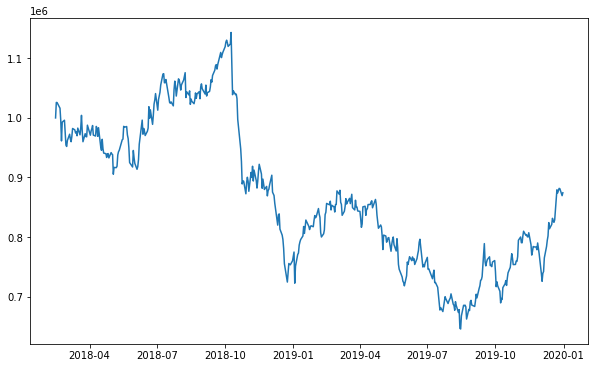

In [18]:
stgy.plotPerformance()